In [1]:
#from __future__ import division
from sympy import *
#from sympy import Symbol
h  = Symbol("h", real=True)
J  = Symbol("J", real=True, positive=True, nonzero=True)
b  = Symbol("b", real=True, positive=True, nonzero=True)
N  = Symbol("N", integer=True, positive=True, nonzero=True)
l1, l2, Z, A = symbols('l1 l2 Z A', cls=Function)
l1 = exp(b*J)*cosh(b*h)+sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))
l2 = exp(b*J)*cosh(b*h)-sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))
Z = l1**N + l2**N
A = -log(Z)/b

In [2]:
import numpy as np
import matplotlib.pyplot as plt
points=50
T = np.linspace(0.2,2.0,num=points)
beta = 1/T
y = np.zeros(points)
### NUMERIC
Np = 50
th = np.tanh(1/T)
thN= th**Np
ch = 1/th
e = -( th + ch*thN )/( 1 + thN )

/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


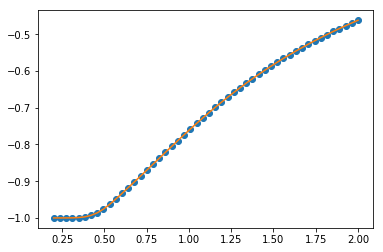

In [4]:
### NUMERIC
e = -( th + ch*thN )/( 1 + thN )
### ANALYTIC
U = symbols('U', cls=Function)
U = diff(b*A,b)/N
for i in range(points):
    y[i] = U.subs([(J, 1), (h, 0), (N, 50), (b, beta[i])]).evalf()
plt.plot(T, e, 'o')
plt.plot(T, y)
plt.show()

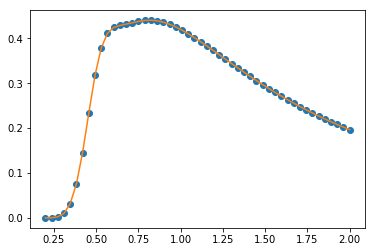

In [5]:
### NUMERIC
heat=(beta**2)*(((1+thN+(Np-1)*(th**2)+(Np-1)*(ch**2)*thN)/(1+thN))-Np*((th+ch*thN)/(1+thN))**2)
### ANALYTIC
Cv = symbols('Cv', cls=Function)
kb = Symbol("kb", real=True, positive=True, nonzero=True)
Cv = -kb*b*b*diff(U,b)
for i in range(points):
    y[i] = Cv.subs([(J, 1), (h, 0), (N, 50), (kb, 1),(b, beta[i])]).evalf()
plt.plot(T, heat, 'o')                   
plt.plot(T, y)
plt.show()

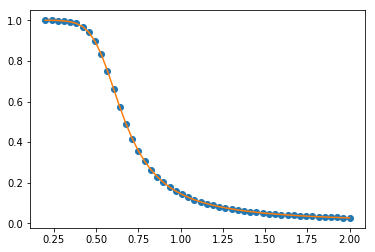

In [11]:
M = symbols('M', cls=Function)
M_ex = symbols('M_ex', cls=Function)
M = -diff(A,h)/N
M_ex = (exp(b*J)*sinh(b*h)*((l1**(N-1))*(1+exp(b*J)*cosh(b*h)/sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))) 
        + (l2**(N-1))*(1-exp(b*J)*cosh(b*h)/sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J)))))/(l1**N+l2**N)
z = np.zeros(points)
for i in range(points):
    y[i] = M.subs([(J, 1), (h, 0.02), (N, 50),(b, beta[i])]).evalf()
    z[i] = M_ex.subs([(J, 1), (h, 0.02), (N, 50),(b, beta[i])]).evalf()

plt.plot(T, z, 'o')
plt.plot(T, y)
plt.show()

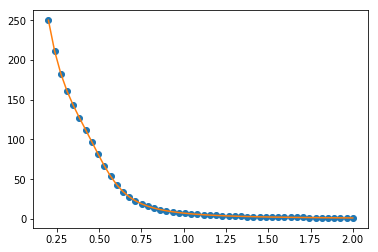

In [11]:
### NUMERIC
X = beta*np.exp(2*beta)*(1-thN)/(1+thN)
### ANALYTIC
Chi = symbols('Chi', cls=Function)
Chi = diff(M,h)
for i in range(points):
    y[i] = Chi.subs([(J, 1), (h, 0), (N, 50),(b, beta[i])]).evalf()
plt.plot(T, X, 'o')
plt.plot(T, y)
plt.show()